In this project, we will analyze a plan in order to extract a navigation map, then we will
implement and compare several ways to find the shortest path between two points in the
plan. Finally, we will use Pattern Matching to find way points defining a tour.

# Load images

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
images_name = os.listdir(os.path.join(os.getcwd(), "images"))

images = {image_name[:image_name.index(".")] : cv2.imread(os.path.join(os.getcwd(), "images", image_name)) for image_name in images_name}
images = { img : cv2.cvtColor(images[img], cv2.COLOR_BGR2RGB) for img in images}
images.keys()

dict_keys(['outdoorMap', 'pattern3', 'pattern1', 'pattern4', 'pattern2'])

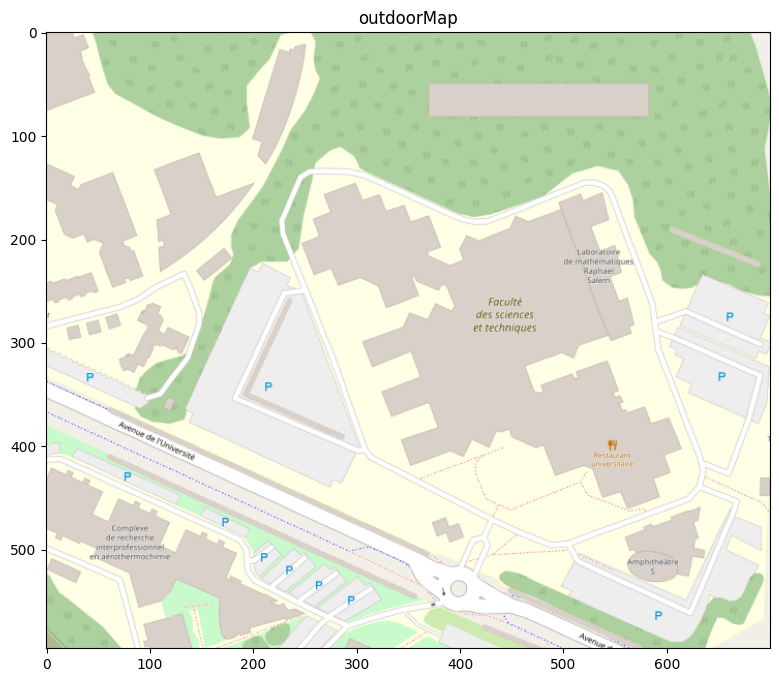

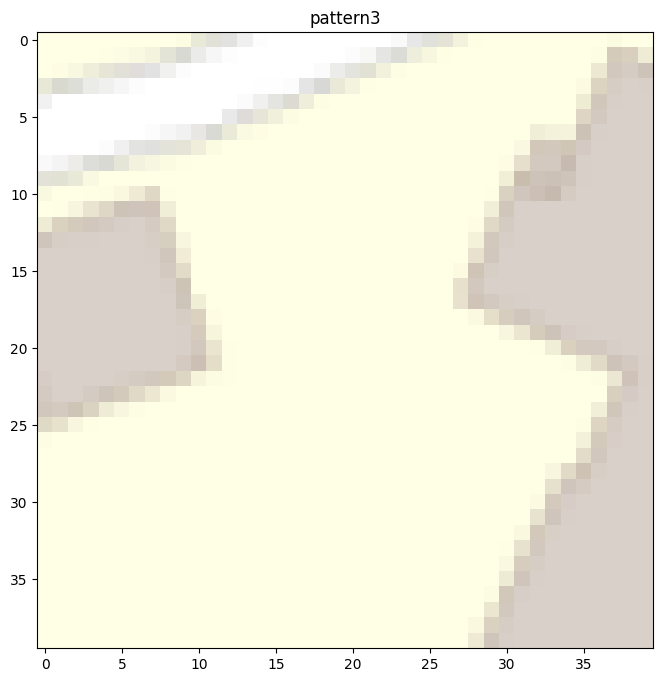

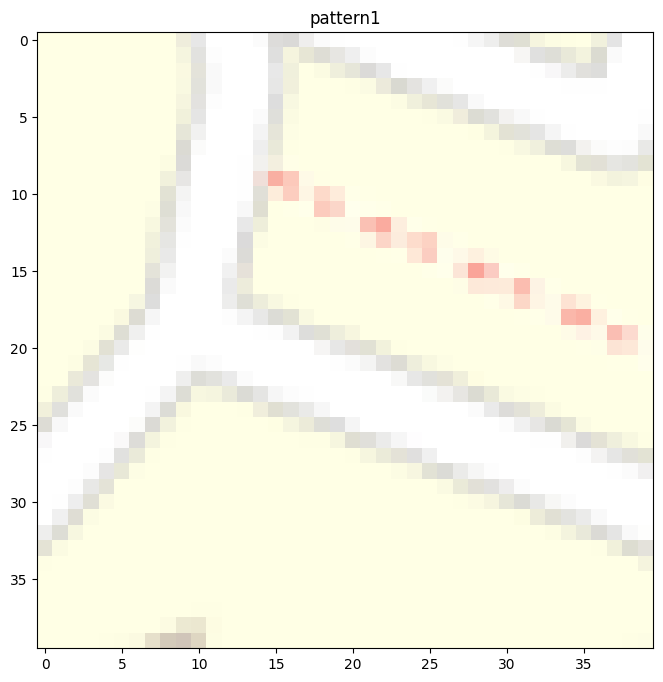

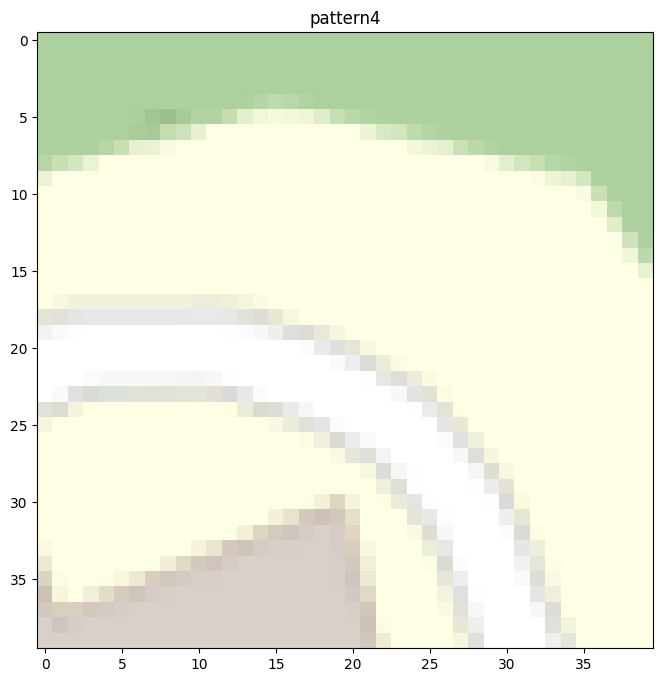

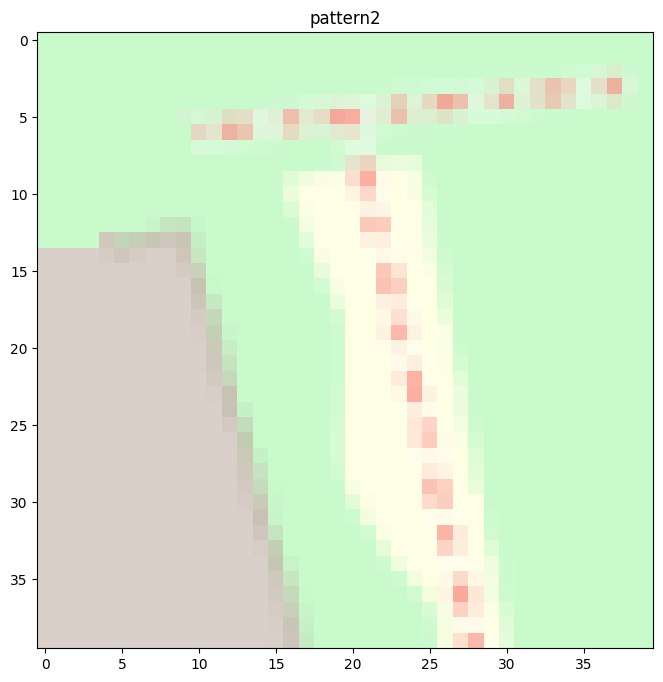

In [13]:
for img in images:
    plt.figure(figsize=(10, 8))
    plt.imshow(images[img])
    plt.title(img)

In [24]:
outdor_map = images["outdoorMap"]



wall_threshold = [217, 208, 201]


Text(0.5, 1.0, 'thresholded_map')

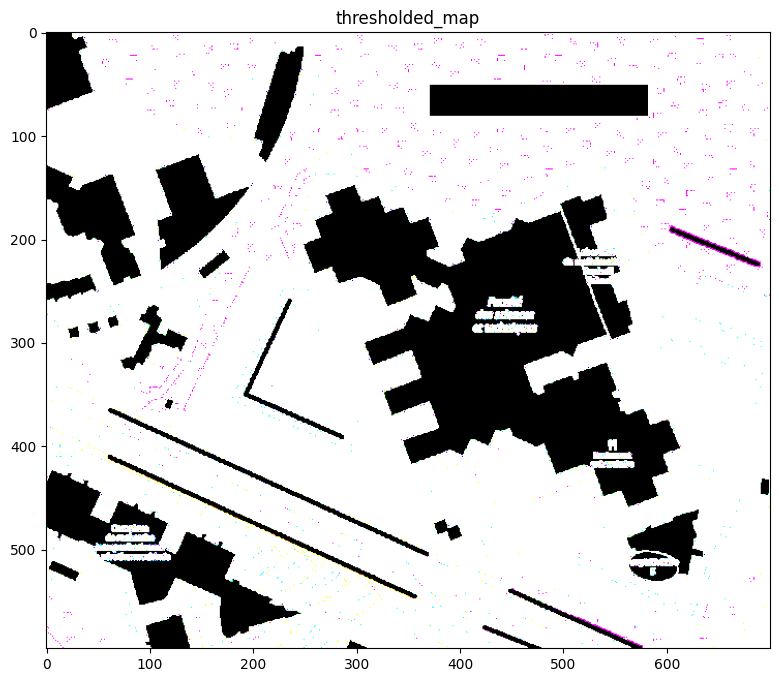

In [45]:
thresholded_map = outdor_map.copy()
mask = outdor_map == wall_threshold
thresholded_map[mask] = 0
thresholded_map[~mask] = 255


plt.figure(figsize=(10, 8))
plt.imshow(thresholded_map)
plt.title("thresholded_map")

Text(0.5, 1.0, 'dilated_mask')

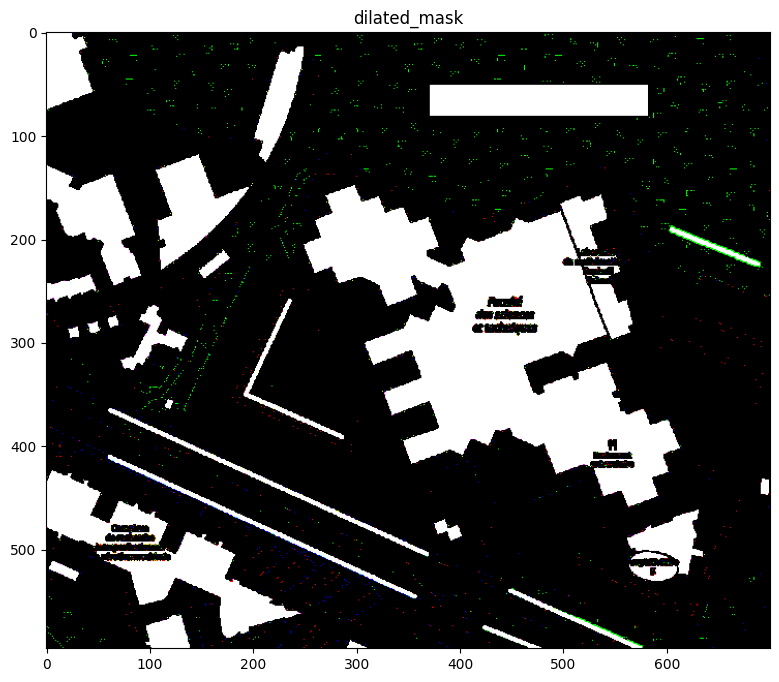

In [49]:

mask = mask.astype(np.int8)*255

plt.figure(figsize=(10, 8))
plt.imshow(mask)
plt.title("dilated_mask")

Text(0.5, 1.0, 'dilated_mask')

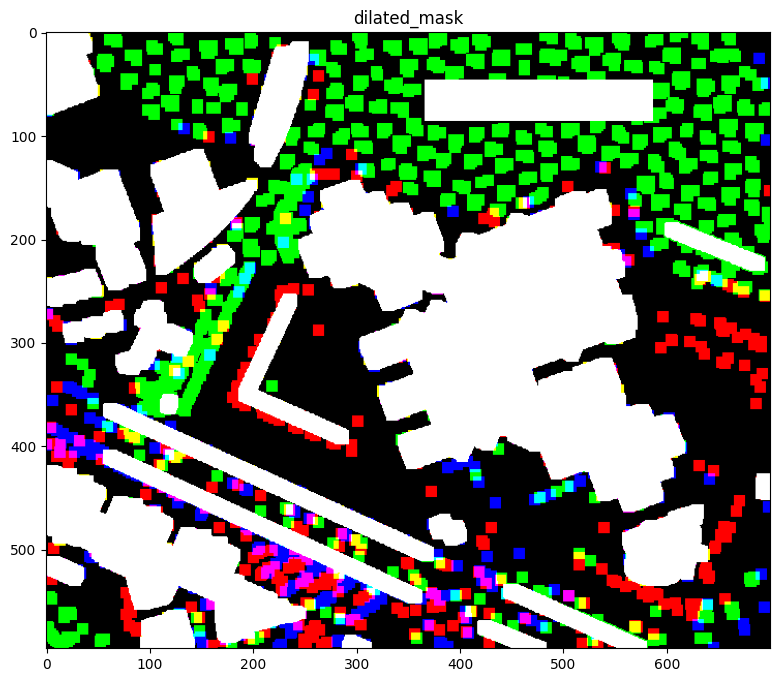

In [50]:

structurant = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))

dilated_mask = cv2.dilate(mask, kernel=structurant)
plt.figure(figsize=(10, 8))
plt.imshow(dilated_mask)
plt.title("dilated_mask")

In [57]:
class Point:
    Ny_Max = 255
    Nx_Max = 255
    def __init__(self, x, y) -> None:
        self._x = x
        self._y = y
        self.h = 0

    def dist(self, A ):
        assert isinstance(A, Point); "TypeError"
        x, y = A.coord
        d = (self._x - x)**2 - (self._y - y)**2
        return np.sqrt(d)

    def foor_neighboor(self, c=255, Ny_Max=255):
        neighboors = [(self._x + i, self._y ) for i in [-1, 1]]
        neighboors += [(self._x , self._y + i) for i in [-1, 1]]
        neighboors = [neighboor for neighboor in neighboors if (neighboor[0]<= Nx_Max and neighboor[0]<= Ny_Max)]
        for neighboor in neighboors:
            yield Point(neighboor[0], neighboors[1])
    
    @classmethod
    def set_max_coor(coord : tuple):
        Nx_max, NyMax = coord
    
    @property
    def coord(self):
        return self._x, self._y    
    
    def __hash__(self) -> int:
        return hash(str(self._x)+ str(self._y))
    
    def __eq__(self, __value: object) -> bool:
        return isinstance(__value, Point) and self.dist(__value) == 0



N= 255
M = np.array((N, N))
start_point = Point(200, 55)
end_point = Point(0, 200)
liste = []
liste = [Point(0, 200)]

while len(liste)> 0 and liste[0] != end_point:
    p0 = liste[0]
    pass

